<a href="https://colab.research.google.com/github/pavansatya/NutriWeb/blob/main/open_food_facts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOAD DATA


In [1]:
import numpy as np 
import os 
import pandas as pd

# Read TSV file and change path according to your directory
df = pd.read_csv('data/en.openfoodfacts.org.products.tsv', sep='\t')
df.head(10) 

/var/folders/fm/08v38d894qqg0x2sfcmb_2mh0000gn/T/ipykernel_38472/1023616688.py:6: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/en.openfoodfacts.org.products.tsv', sep='\t')


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,16100,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055651,2017-03-09T10:34:11Z,1489055651,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,16117,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055730,2017-03-09T10:35:30Z,1489055730,2017-03-09T10:35:30Z,Organic Long Grain White Rice,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,16124,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055711,2017-03-09T10:35:11Z,1489055712,2017-03-09T10:35:12Z,Organic Muesli,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,NaN,NaN
8,16193,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055651,2017-03-09T10:34:11Z,1489055651,2017-03-09T10:34:11Z,Organic Dark Chocolate Minis,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,16513,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055654,2017-03-09T10:34:14Z,1489055654,2017-03-09T10:34:14Z,Organic Sunflower Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.columns.values

array(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity', 'packaging', 'packaging_tags',
       'brands', 'brands_tags', 'categories', 'categories_tags',
       'categories_en', 'origins', 'origins_tags', 'manufacturing_places',
       'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en',
       'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo',
       'cities', 'cities_tags', 'purchase_places', 'stores', 'countries',
       'countries_tags', 'countries_en', 'ingredients_text', 'allergens',
       'allergens_en', 'traces', 'traces_tags', 'traces_en',
       'serving_size', 'no_nutriments', 'additives_n', 'additives',
       'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n',
       'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil',
   

These are the columns that only have null values in them so I am considering to drop these columns as they do not contribute meaningful information.

In [3]:
# List of columns with only null values
df.drop_duplicates(inplace=True)
null_columns = df.columns[df.isnull().all()].tolist()
null_columns

['no_nutriments',
 'ingredients_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil',
 'nutrition_grade_uk',
 '-butyric-acid_100g',
 '-caproic-acid_100g',
 '-lignoceric-acid_100g',
 '-cerotic-acid_100g',
 '-melissic-acid_100g',
 '-elaidic-acid_100g',
 '-mead-acid_100g',
 '-erucic-acid_100g',
 '-nervonic-acid_100g',
 'chlorophyl_100g',
 'glycemic-index_100g',
 'water-hardness_100g']

In [4]:
# Dropping those columns which only has Null values
df.drop(columns = null_columns, inplace=True, axis=1)

We are also dropping **energy-from-fat_100g**, **states_tags** columns as recent updates to labeling regulations (e.g., the FDA's 2016 overhaul of nutrition labels in the U.S.) have shifted focus away from highlighting fat calories, as it is now more common to emphasize the type of fat (e.g., saturated fat, trans fat) rather than the total calories from fat.  Instead, the label typically lists:

**How it is calculated?**

If the label does not explicitly state the energy from fat, you can calculate it using the following steps:

1.   Find the total fat content listed on the label (usually in grams).

2.   Multiply the total fat grams by 9 (since fat provides 9 calories per gram).

Column **states_tags** is just a copy to **states** column.

In [5]:
df.drop(columns = ['energy-from-fat_100g', 'states_tags'], inplace=True, axis=1)
df.shape

(356027, 145)

#### Total null values distribution across each column

In [6]:
# Lets see how many null values are present in each column with percentages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

null_percentages = df.isnull().mean() * 100
null_percentages = null_percentages[null_percentages > 0]
fig = px.bar(x=null_percentages.index, y=null_percentages.values, labels={'x': 'Columns', 'y': 'Percentage of Null Values'}, title='Percentage of Null Values in Each Column')
plt.figure(figsize=(20, 6))
fig.show()

# If the image is not visible in notebook. Go to images and look at 'null_value_visualisation.png'.

<Figure size 2000x600 with 0 Axes>

In [7]:
df.iloc[:, 59:].head(7)

,fat_100g,saturated-fat_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,...,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28.57,28.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0
2,17.86,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,57.14,5.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0
4,1.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,18.27,1.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print(df[df['nutrition-score-uk_100g'].isnull()][['energy_100g', 'sugars_100g', 'saturated-fat_100g', 'sodium_100g', 'salt_100g', 'fiber_100g', 'proteins_100g']].head(10))

    energy_100g  sugars_100g  saturated-fat_100g  sodium_100g  salt_100g  \
0           NaN          NaN                 NaN          NaN        NaN   
4        1552.0          NaN                 NaN          NaN        NaN   
5        1933.0        11.54                1.92          NaN        NaN   
6        1490.0          NaN                 NaN          NaN        NaN   
8        2406.0        42.50               22.50          NaN        NaN   
9        3586.0          NaN                7.14          NaN        NaN   
10       1393.0          NaN                 NaN          NaN        NaN   
11       1540.0          NaN                 NaN          NaN        NaN   
13       2590.0          NaN                4.76        0.038    0.09652   
14       2536.0          NaN                9.09        0.227    0.57658   

    fiber_100g  proteins_100g  
0          NaN            NaN  
4          5.7           8.57  
5          7.7          13.46  
6          NaN           8.89  
8  

For columns like **nutrition-score-uk_100g**, **nutrition-score-fr_100g** there are null values for 31% data. This column refers to the nutrition score given to food products by:

1.   French Nutri-Score: Developed by the French Public Health Agency (Santé Publique France).
2.   UK Nutrient Profiling Model: Developed by the Food Standards Agency (FSA) in the UK.

**The reason behind this is**:

*   The nutrition scores are calculated based on specific nutritional information (e.g., energy, fat, sugar, protein, fiber, etc.). If any of these values are missing or incomplete for a product, the score cannot be calculated, resulting in a null value.
*   Certain product categories (e.g., supplements, baby food, or alcoholic beverages) may not be eligible for a Nutri-Score or UK score due to regulatory or methodological limitations.
*   Nutritional labeling requirements vary by country. Some products might not provide all the necessary information required for calculating the scores.

**What we did**:

We replaced these null values with *not given*.

In [9]:
df['nutrition-score-uk_100g'] = df['nutrition-score-uk_100g'].fillna('not given')
df['nutrition-score-fr_100g'] = df['nutrition-score-fr_100g'].fillna('not given')
df['nutrition_grade_fr'] = df['nutrition_grade_fr'].fillna('not given')

In [10]:
df['quantity'] = df['quantity'].fillna('Unknown')

One of our primary goals while starting our project is to include sustainability and recommend eco-friendly products. But, when we looked at the **carbon-footprint_100g** column of our dataset, over 99.9% of the data has null values. This is because of the following reasons:

1.   Unlike nutrient facts (e.g., calories, fat, protein), there are no widespread regulatory requirements for disclosing carbon footprint information on food labels.
2.   Governments and regulatory bodies (e.g., FDA in the U.S., EFSA in the EU) have not yet mandated carbon footprint labeling, so most manufacturers are not obligated to include it.
3.   Variability in supply chains, for example: the carbon footprint of an orange can vary significantly depending on whether it was grown locally or imported from another country.

**What we did**:

For those columns, where data is null, we imputed them with *no informartion* in place of null values.

In [11]:
df['carbon-footprint_100g'] = df['carbon-footprint_100g'].fillna('no information')

The null values are in columns containing nutrient facts about food products, such as energy, proteins, carbs, etc. We found that there are 0 values (for products containing no such nutrient in them) and null values.

**0** implies that the nutrient is confirmed to be absent in the product (e.g., a sugar-free product has 0g of sugar). **Null** (or **NaN**) indicates that the value is unknown or not provided. This distinction is important for data accuracy and analysis.

**For example**:
*   If a nutrient is not listed on the label, it could mean the product contains a negligible amount, but the exact value is unknown. In some regions, certain nutrients are not required to be listed on the label unless they are present above a specific threshold.

*   Entering 0 in such cases could misrepresent the data, as it might not be accurate.

**What we did**:

After thorough research and checking with the original database, for simplifying the dataset for analysis or modeling. We deleted the rows that have **NaN** values across all the columns with nutrient data and replaced those with 0 for null values where just micro nutrients (vitamins, minerals, fats & acids) are given null.

In [12]:
columns_range = df.iloc[:, 59:143]

# Check which rows have ALL null values in the selected columns
null_rows = columns_range.isna().all(axis=1)

# Get the indices of these rows
null_row_indices = null_rows[null_rows].index

df.loc[null_row_indices, ['code', 'product_name']]

,code,product_name


For example, lets take a look at Product code: *30113*, Product name: *Naturakrill original*

You can clearly see that the product mentioned in our dataset is different from the one available in database. This is because of the opencrowd source nature of the database and ambiguous barcode

In [13]:
df[df['product_name']=='Naturakrill original'].iloc[:, 59:143]

,fat_100g,saturated-fat_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,...,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no information


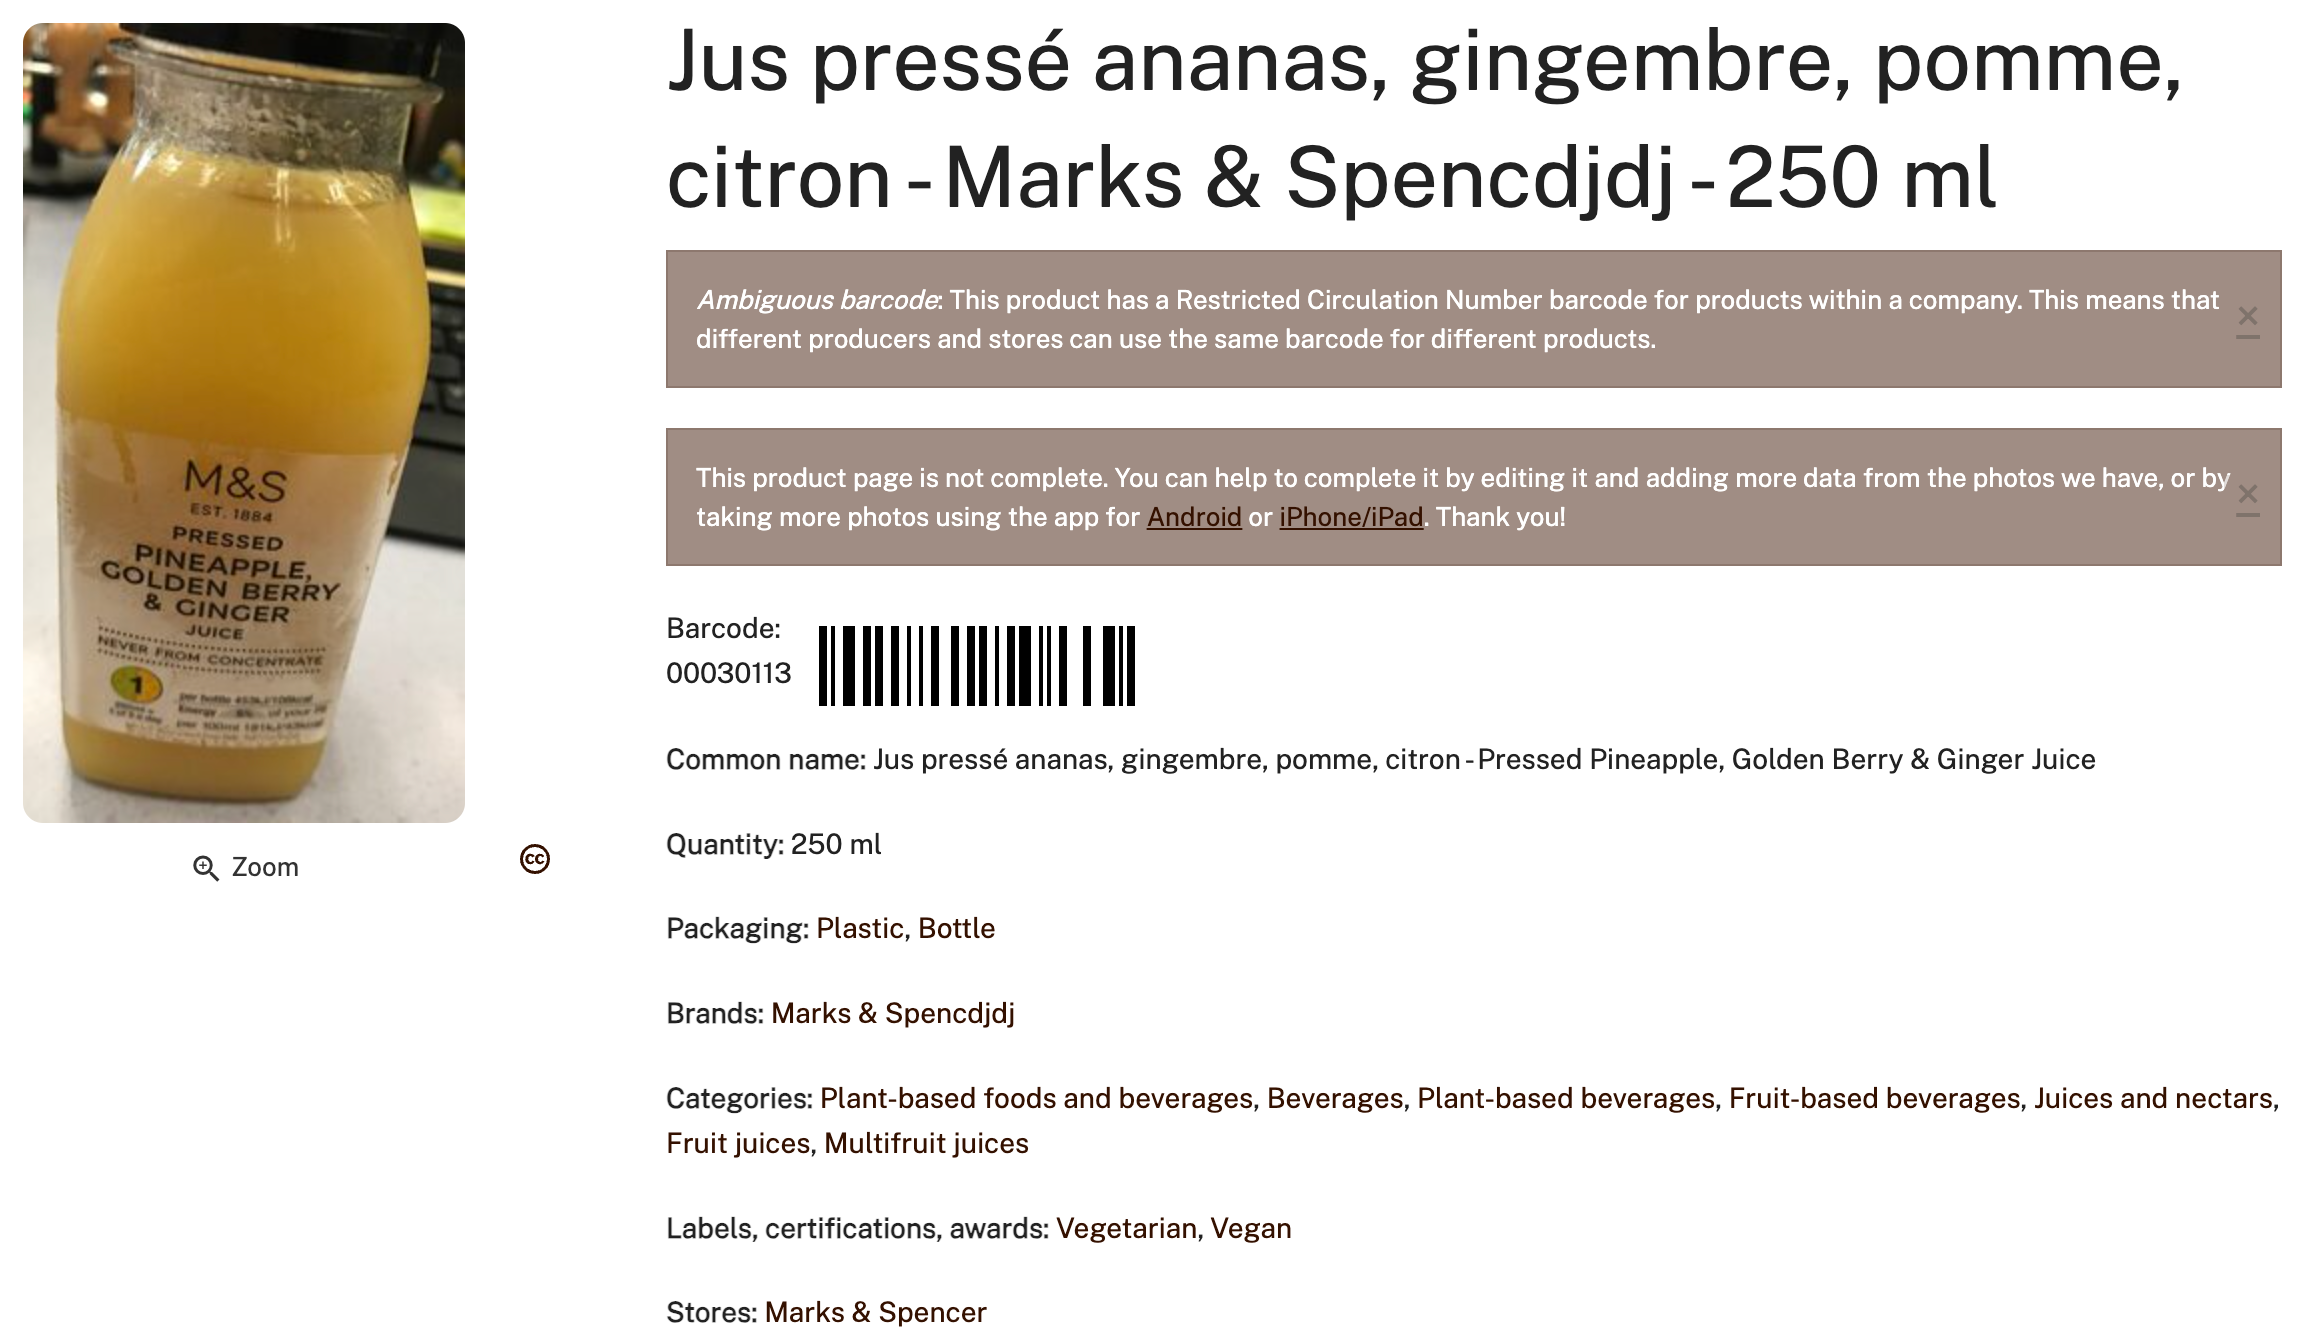

In [14]:
# For checking column number
print(df.columns.get_loc('saturated-fat_100g'), df.columns.get_loc('salt_100g'))

60 101


In [15]:
# Check which rows have null values in the energy column and delete them for now:
null_energy_rows = df[df['energy_100g'].isnull()]
df_cleaned = df.dropna(subset=['energy_100g'])

In [16]:
df_cleaned = df_cleaned.dropna(subset=['product_name'])

In [17]:
print(f"Cleaned dataset size: {len(df_cleaned)}")
print(df_cleaned['energy_100g'].isnull().sum())

Cleaned dataset size: 291981
0


In [18]:
df_cleaned.iloc[:, 59:143] = df_cleaned.iloc[:, 59:143].fillna(0)
df_cleaned.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,Unknown,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no information,14.0,14.0
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,Unknown,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no information,0.0,0.0
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,Unknown,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no information,12.0,12.0
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,Unknown,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no information,not given,not given
5,16100,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055651,2017-03-09T10:34:11Z,1489055651,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,NaN,Unknown,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no information,not given,not given


# Distribution of Nutrition grade France

In [19]:
import kaleido
import plotly.express as px
import plotly.io as pio
from IPython.display import Image

# Define nutrition grade colors corresponding to ['a', 'b', 'c', 'd', 'e', 'not given']
nutrition_grade_colors = {
    'a': 'green', 'b': 'lightgreen', 'c': 'yellow', 'd': 'orange', 'e': 'red', 'not given': 'black'
}

# Count occurrences of each nutrition grade
grade_counts = df_cleaned['nutrition_grade_fr'].value_counts().reindex(['a', 'b', 'c', 'd', 'e', 'not given'], fill_value=0)

# Create Plotly bar chart
fig = px.bar(
    x=grade_counts.index,
    y=grade_counts.values,
    text=grade_counts.values,  # Display count on bars
    color=grade_counts.index,  # Color by category
    color_discrete_map=nutrition_grade_colors,
    labels={'x': 'Nutrition Grade', 'y': 'Number of Products'},
    title='Distribution of Nutrition Grades Scores'
)

# Update layout to improve visibility
fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='Nutrition Grade',
    yaxis_title='Number of Products',
    showlegend=False
)

# Save as an interactive HTML file
pio.write_html(fig, "nutrition_grades_distribution.html")

# Show the figure
fig.show()

# Distribution of Nutrition-Scores by France

Countries like France and England have given a score from negative to positive for every product. Lets see a histogram of these scores and how they varies for all products.

In [20]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.layouts import gridplot
import panel as pn


# Filter data
filtered_df = df_cleaned[(df_cleaned['nutrition-score-uk_100g'] != 'not given') & (df_cleaned['nutrition-score-fr_100g'] != 'not given')]

# Create Bokeh figures
p1 = figure(title="Nutrition Score UK 100g", x_axis_label='Score', y_axis_label='Count', background_fill_color="#fafafa")
p2 = figure(title="Nutrition Score FR 100g", x_axis_label='Score', y_axis_label='Count', background_fill_color="#fafafa")

# Create histograms
hist_uk, edges_uk = np.histogram(filtered_df['nutrition-score-uk_100g'], bins=20)
hist_fr, edges_fr = np.histogram(filtered_df['nutrition-score-fr_100g'], bins=20)

# Add histograms to figures
p1.quad(top=hist_uk, bottom=0, left=edges_uk[:-1], right=edges_uk[1:], fill_color="navy", line_color="white", alpha=0.5)
p2.quad(top=hist_fr, bottom=0, left=edges_fr[:-1], right=edges_fr[1:], fill_color="red", line_color="white", alpha=0.5)

# Combine plots into a grid
grid = gridplot([[p1, p2]])

# Show the plot
output_notebook()
show(grid)

# Create a Panel dashboard
dashboard = pn.Row(grid)

# Serve the dashboard
# pn.serve(dashboard)

Loading BokehJS ...

# RECOMMENDER SYSTEM

In [21]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity

In [22]:
# # Example dataset
# ingredients = df['ingredients_text']

# # Combine ingredients and brands
# data = [f"{ing}" for ing in zip(ingredients)]

# # TF-IDF Vectorization
# vectorizer = TfidfVectorizer()
# tfidf_matrix = vectorizer.fit_transform(data)

# # User preference
# user_pref = "tomato, cheese"
# user_vector = vectorizer.transform([user_pref])

# # Compute similarity
# similarity = cosine_similarity(user_vector, tfidf_matrix)
# print(similarity)

In [23]:
# import numpy as np
# similarity_scores = similarity.flatten()

# # Get indices of the top N recommendations
# top_n = 5  # Number of recommendations
# top_indices = np.argsort(similarity_scores)[-top_n:][::-1]  # Sort in descending order

# # Get the corresponding similarity scores
# top_scores = similarity_scores[top_indices]

# # Print the results
# print("Top Indices:", top_indices)
# print("Top Scores:", top_scores)


In [24]:
# df.loc[top_indices, ['code', 'product_name']]

# Data Cleaning

The columns *brands* and *brands_tags* gives us the brand which manufactured the product. Some values, even though they are same brands are considered as different due to open source nature of this database and human error. So, we are considering only *brands* column and we also imputed the 6071 null values as 'not mentioned'. We standardised all the values to reduce duplicity.

In [25]:
df_cleaned['brands'] = df_cleaned['brands'].fillna('not mentioned')

In [26]:
from modules.standardize import standardize
# # Apply the function to the 'Allergens' column
df_cleaned['brands'] = df_cleaned['brands'].apply(standardize)

The column 'categories' is one of the most important one for our recommendation system. This column has over 210,000 null values in it and it will be a huge problem if we simply give 'unknown' inplace of null. So, we have decided to use semantic meaning to assign categories to null values based on the product name is a much more sophisticated and effective approach than simply filling with 'unknown'. This can be achieved using **Natural Language Processing** (NLP) techniques, such as **text similarity**, **keyword extraction**, or even pre-trained language models like **BERT**.

In [27]:
df_cleaned['categories_en'].value_counts()

categories_en
Beverages,Non-sugared beverages                                                                                                                                                                                     2327
Sugary snacks,Biscuits and cakes,Biscuits                                                                                                                                                                            797
Fats                                                                                                                                                                                                                 730
Sugary snacks,Chocolates,Dark chocolates                                                                                                                                                                             603
Groceries,Sauces,Tomato sauces,Ketchup                                                                                

In [28]:
df_cleaned['categories_en'] = df_cleaned['categories_en'].fillna('Not Mentioned')

In [29]:
# Split the categories_en column into 5 levels
split_categories = df_cleaned['categories_en'].str.split(',', expand=True, n=5)

# Rename the columns
split_categories.columns = [f'category_level_{i+1}' for i in range(split_categories.shape[1])]

# Concatenate the split columns back to the original DataFrame
df_cleaned = pd.concat([df_cleaned, split_categories], axis=1)

# Fill NaN values with a placeholder (optional)
df_cleaned[split_categories.columns] = split_categories.fillna('Not Specified')

In [30]:
# Split the categories_en column into individual categories
all_categories = df_cleaned['categories_en'].str.split(',').explode()

# Count the frequency of each category
category_counts = all_categories.value_counts()

# Display the top 10 most frequent categories
print(category_counts)

categories_en
Not Mentioned                              210937
Plant-based foods and beverages             24911
Plant-based foods                           20947
Sugary snacks                               11971
Beverages                                   10831
                                            ...  
fr:Sables-fourres                               1
fr:Chocolat-noir-70-cacao-bio-equitable         1
fr:Gaches-tranchees                             1
fr:Preparation-pour-pate-a-pizza                1
fr:Biscottes-au-sarrasin                        1
Name: count, Length: 12380, dtype: int64


In [31]:
import plotly.express as px

# Filter out unwanted values
df_filtered = df_cleaned[
    (df_cleaned['category_level_1'] != "not mentioned") &
    (df_cleaned['category_level_2'] != "Not Specified") &
    (df_cleaned['category_level_3'] != "Not Specified")
]

# Create a treemap without the excluded values
fig = px.treemap(df_filtered, path=['category_level_1', 'category_level_2', 'category_level_3'], title='Category Hierarchy (Filtered)')
fig.show()

**Limitation** 

The column *ingredients_text* has null values becuase the database does not have the information about the ingredients of the recipe. This is a limitation of the database and it would be better to have this information available for a more complete analysis. For now, we are going to ignore this limitation by imputing them with a generic string "Ingredients are missing".

In [32]:
df_cleaned['ingredients_text'] = df_cleaned['ingredients_text'].fillna('Ingredients are missing')

### Distribution of Nutrition grades across Top 10 categories

This is the distribution of nutrition grades across top 10 categories excluding unknown categories of products from our data

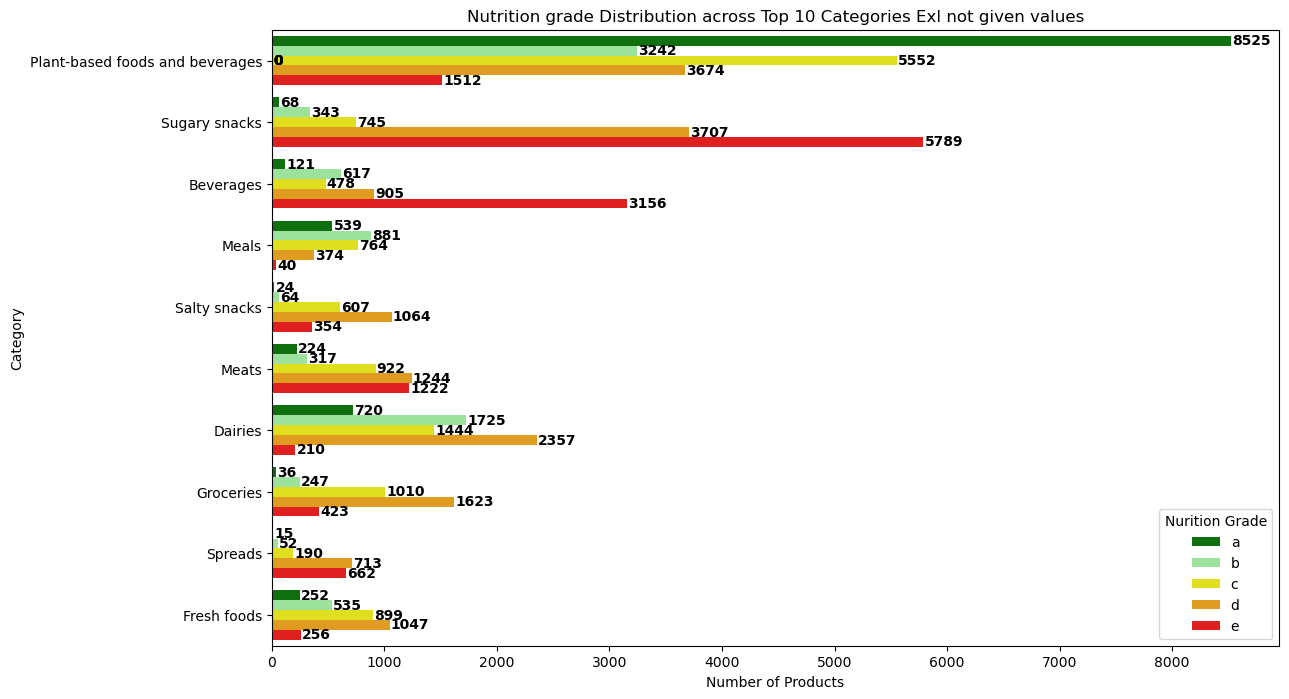

In [33]:
# Nutrition grades Distribution across Top 10 Categories
nutrition_score_colors = {'a': 'green', 'b': 'lightgreen', 'c': 'yellow', 'd': 'orange', 'e': 'red'}
top_categories_count = 10
filtered_df = df_cleaned[(df_cleaned['nutrition_grade_fr'] != 'not given') & (df_cleaned['category_level_1']!= 'Not Mentioned')]
top_categories = filtered_df['category_level_1'].value_counts().head(top_categories_count).index 

plt.figure(figsize=(13, 8))
ax = sns.countplot(y='category_level_1', hue='nutrition_grade_fr', data= filtered_df[filtered_df['category_level_1'].isin(top_categories)],
                   hue_order=['a', 'b', 'c', 'd', 'e'], palette=nutrition_score_colors)

# Annotate each bar with its count
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_x() + width, p.get_y() + height / 2
    ax.annotate(f'{int(width)}', (x + 10, y), ha='left', va='center', color='black', weight='bold', fontsize=10)

ax.set_title('Nutrition grade Distribution across Top 10 Categories Exl not given values')
ax.set_xlabel('Number of Products')
ax.set_ylabel('Category')
ax.legend(title='Nurition Grade')
plt.show()

Clean **labels_en** column

In [34]:
df_cleaned['labels_en'] = df_cleaned['labels_en'].fillna('Labels are missing')

**Limitation**

The column *allergens_en* has all null values although the food products have allergens. This is because the data is not complete and the allergens are not specified in the data. Therefore, the column *allergens_en* is not imputed by using *ingredients_text* and *product_name*, as they have ingredients if not product names atleast.

These are the 9 most common allergens in USA: milk, eggs, fish, shellfish, tree nuts, peanuts, wheat, soybeans, and sesame

In [35]:
from modules.allergens import fill_allergens

# Apply the function to fill missing allergens
df_cleaned['allergens_en'] = df_cleaned.apply(fill_allergens, axis=1)

# Handle remaining missing values (if any)
df_cleaned['allergens_en'] = df_cleaned['allergens_en'].fillna('unknown')

In [36]:
df_cleaned['allergens_en'].value_counts().head(25)

allergens_en
unknown                   187704
milk                       23271
wheat                      13428
soy, wheat                  9943
soy, milk                   8654
soy                         6730
soy, milk, wheat            5881
milk, wheat                 4639
soy, milk, wheat, eggs      2716
peanuts                     1854
soy, eggs, wheat            1823
milk, wheat, eggs           1802
soy, milk, peanuts          1596
sesame                      1338
fish                        1272
tree nuts                   1270
eggs, wheat                 1203
soy, eggs                   1155
eggs                        1007
soy, milk, eggs             1001
milk, tree nuts             1001
shellfish                    968
milk, eggs                   967
soy, wheat, sesame           962
milk, peanuts                881
Name: count, dtype: int64

In [37]:
df_cleaned[['additives_n', 'ingredients_text', 'additives', 'additives_en', 'code']]

,additives_n,ingredients_text,additives,additives_en,code
1,0.0,"Bananas, vegetable oil (coconut oil, corn oil ...",[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,4530
2,0.0,"Peanuts, wheat flour, sugar, rice flour, tapio...",[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,4559
3,0.0,"Organic hazelnuts, organic cashews, organic wa...",[ organic-hazelnuts -> en:organic-hazelnuts ...,NaN,16087
4,0.0,Organic polenta,[ organic-polenta -> en:organic-polenta ] [...,NaN,16094
5,0.0,"Rolled oats, grape concentrate, expeller press...",[ rolled-oats -> en:rolled-oats ] [ oats ->...,NaN,16100
...,...,...,...,...,...
356005,NaN,Ingredients are missing,NaN,NaN,9847548283004
356010,NaN,Ingredients are missing,NaN,NaN,9900000000233
356017,0.0,"thé vert, arôme naturel bergamote avec autres ...",[ the-vert -> fr:the-vert ] [ the -> fr:the...,NaN,99111250
356022,0.0,"Organic peppermint, organic lemon grass, organ...",[ organic-peppermint -> en:organic-peppermint...,NaN,99567453


In [38]:
df_cleaned.iloc[0]['ingredients_text']

'Bananas, vegetable oil (coconut oil, corn oil and/or palm oil) sugar, natural banana flavor.'

In [39]:
df_cleaned.iloc[0]['additives']

' [ bananas -> en:bananas  ]  [ vegetable-oil -> en:vegetable-oil  ]  [ oil -> en:oil  ]  [ coconut-oil -> en:coconut-oil  ]  [ oil -> en:oil  ]  [ corn-oil-and-or-palm-oil-sugar -> en:corn-oil-and-or-palm-oil-sugar  ]  [ oil-and-or-palm-oil-sugar -> en:oil-and-or-palm-oil-sugar  ]  [ and-or-palm-oil-sugar -> en:and-or-palm-oil-sugar  ]  [ or-palm-oil-sugar -> en:or-palm-oil-sugar  ]  [ palm-oil-sugar -> en:palm-oil-sugar  ]  [ oil-sugar -> en:oil-sugar  ]  [ sugar -> en:sugar  ]  [ natural-banana-flavor -> en:natural-banana-flavor  ]  [ banana-flavor -> en:banana-flavor  ]  [ flavor -> en:flavor  ] '

The column *additives_tags* is simply a list of strings, where each string is a tag of *ingredients_text* column. So, this column cab be dropped from our dataset to reduce complexity. We can do this by using the following code:

In [40]:
df_cleaned.drop(columns=['additives'], inplace=True)

The columns *additives_en*, *additives_tags* contains of all the additives used in the food product. The column *additives_tags* contains the same as *additives_en* nut as in string format with '-' so, we are removing it.

In [41]:
from modules.additives import extract_codes

# Replace NaN with "No additives"
df_cleaned['additives_en'] = df_cleaned['additives_en'].fillna('No additives')

# Apply the function to the additives_en column
df_cleaned['additives_en'] = df_cleaned['additives_en'].apply(extract_codes)

As we already dropped *ingredients_from_palm_oil* and *ingredients_that_may_be_from_palm_oil*, we also removing *ingredients_that_may_be_from_palm_oil_n* and *ingredients_that_may_be_from_palm_oil_tags* columns from our dataset. 

## Food Macronutrients Composition and Energy: 

In this analysis, we will investigate the macronutrients breakdown across various kind of food. We will use the pnns_groups classification variables to summarize our results. We will look at if there are correlation between energy and the macronutrients breakdown (carbohydrates, fats and proteins).

Let's start by building a DataFrame with the products with pnns groups and do some cleaning :

In [42]:
df_nutrients = df_cleaned.loc[(df_cleaned.pnns_groups_1.notnull()) & (df_cleaned.pnns_groups_2.notnull()) & (df_cleaned.energy_100g > 0), :].copy()

print('DataFrame shape: {}'.format(df_nutrients.shape))

DataFrame shape: (103406, 150)


In [43]:
# Get the PNNS Groups 1 existing values
pd.DataFrame({'PNNS Group 1': df_nutrients.pnns_groups_1.unique()})

,PNNS Group 1
0,unknown
1,Fruits and vegetables
2,Sugary snacks
3,Beverages
4,Composite foods
5,Fish Meat Eggs
6,Fat and sauces
7,Salty snacks
8,Cereals and potatoes
9,Milk and dairy products


In [44]:
# Get the PNNS Groups 2 existing values
pd.DataFrame({'PNNS Group 2': df_nutrients.pnns_groups_2.unique()})

,PNNS Group 2
0,unknown
1,Vegetables
2,Biscuits and cakes
3,Sweetened beverages
4,Pizza pies and quiche
5,Meat
6,Sweets
7,Non-sugared beverages
8,Dressings and sauces
9,One-dish meals


In [45]:
# Strip
df_nutrients.pnns_groups_1 = df_nutrients.pnns_groups_1.str.strip()
df_nutrients.pnns_groups_2 = df_nutrients.pnns_groups_2.str.strip()

# Capitalize every groups
df_nutrients.pnns_groups_1 = df_nutrients.pnns_groups_1.str.capitalize()
df_nutrients.pnns_groups_2 = df_nutrients.pnns_groups_2.str.capitalize()

# Replace the - by whitespaces
df_nutrients.pnns_groups_1 = df_nutrients.pnns_groups_1.str.replace('-', ' ')
df_nutrients.pnns_groups_2 = df_nutrients.pnns_groups_2.str.replace('-', ' ')

In [46]:
# Check the cleaning
pd.DataFrame({'PNNS Group 1': df_nutrients.pnns_groups_1.unique()})

,PNNS Group 1
0,Unknown
1,Fruits and vegetables
2,Sugary snacks
3,Beverages
4,Composite foods
5,Fish meat eggs
6,Fat and sauces
7,Salty snacks
8,Cereals and potatoes
9,Milk and dairy products


In [47]:
col_list = ['product_name',
            'pnns_groups_1',
            'pnns_groups_2',
            'energy_100g',
            'carbohydrates_100g',
            'sugars_100g',
            'starch_100g',
            'polyols_100g',
            'fat_100g',
            'saturated-fat_100g',
            'monounsaturated-fat_100g',
            'polyunsaturated-fat_100g',
            'trans-fat_100g',
            'proteins_100g',
            'casein_100g',
            'serum-proteins_100g',
            'fiber_100g',
            'salt_100g'
            ]

# Variables that will be used for the analysis (only top level macronutrients and energy)
facts_for_analysis = ['energy_100g',
                      'carbohydrates_100g',
                      'fat_100g',
                      'proteins_100g',
                      'fiber_100g',
                      'salt_100g'
                     ]

# Keep only the required variables and exclude the unknown pnns groups
df_nutrients = df_nutrients[df_nutrients.pnns_groups_1 != 'unknown'].reindex(columns=col_list)

print('Number of observations: {}'.format(df_nutrients.shape[0]))
df_nutrients.head()

Number of observations: 103406


,product_name,pnns_groups_1,pnns_groups_2,energy_100g,carbohydrates_100g,sugars_100g,starch_100g,polyols_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,proteins_100g,casein_100g,serum-proteins_100g,fiber_100g,salt_100g
140,Pack de 2 Twix,Unknown,Unknown,1481.0,77.08,0.00,0.0,0.0,4.17,0.000,0.00,0.00,0.000,6.25,0.0,0.0,6.20,0.000
176,Salade Cesar,Fruits and vegetables,Vegetables,1210.0,23.00,0.00,0.0,0.0,12.00,7.000,0.00,0.00,0.000,22.00,0.0,0.0,2.00,2.160
177,Danoises à la cannelle roulées,Sugary snacks,Biscuits and cakes,1520.0,54.10,28.10,0.0,0.0,14.40,0.000,0.00,0.00,0.000,4.79,0.0,0.0,2.05,0.922
182,Chaussons tressés aux pommes,Sugary snacks,Biscuits and cakes,1090.0,38.70,24.70,0.0,0.0,10.70,2.000,3.33,5.33,0.667,3.33,0.0,0.0,2.00,0.647
183,Pain Burger Artisan,Unknown,Unknown,1160.0,53.30,1.11,0.0,0.0,1.11,0.333,0.00,0.00,0.000,10.00,0.0,0.0,2.22,1.520


In [48]:
# Get the number of product by pnns groups 
by_pnns = df_nutrients.groupby(['pnns_groups_1', 'pnns_groups_2'])
by_pnns.size().sort_values(ascending=False)

pnns_groups_1            pnns_groups_2                   
Unknown                  Unknown                             33126
Composite foods          One dish meals                       5810
Sugary snacks            Biscuits and cakes                   4953
Beverages                Non sugared beverages                4407
Sugary snacks            Sweets                               4368
Cereals and potatoes     Cereals                              4259
Milk and dairy products  Milk and yogurt                      3829
                         Cheese                               3781
Fat and sauces           Dressings and sauces                 3676
Fish meat eggs           Processed meat                       3155
Sugary snacks            Chocolate products                   3050
Fruits and vegetables    Vegetables                           2943
Beverages                Sweetened beverages                  2730
Fish meat eggs           Fish and seafood                     2497
Fat 

### Statistics : Macronutrients by PNNS Groups

In [49]:
# Compute the statistics by pnns groups
by_pnns = df_nutrients.groupby(['pnns_groups_1', 'pnns_groups_2'])
stats_by_pnns = by_pnns.describe()

# Buid a DataFrame with only the mean (just for readability)
means_by_pnns = stats_by_pnns.loc[:, (facts_for_analysis , 'mean')]

# Remove the column index level 1
means_by_pnns.columns = means_by_pnns.columns.droplevel(1)

# Change the order of the variables (energy first then macronutrients)
means_by_pnns = means_by_pnns.reindex(columns=facts_for_analysis)
means_by_pnns.round(2)

energy_100g  \
pnns_groups_1           pnns_groups_2                                   
Beverages               Artificially sweetened beverages       126.84   
                        Fruit juices                           203.86   
                        Fruit nectars                          198.87   
                        Non sugared beverages                  290.79   
                        Sweetened beverages                    367.85   
Cereals and potatoes    Bread                                 1328.48   
                        Breakfast cereals                     1679.93   
                        Cereals                               1346.79   
                        Legumes                                950.96   
                        Potatoes                               538.95   
Composite foods         One dish meals                         626.80   
                        Pizza pies and quiche                  980.27   
                        Sandwich                              1022.16   
Fat and sauces          Dressings and sauces                   926.15   
                        Fats                                  3028.79   
Fish meat eggs          Eggs                                   623.24   
                        Fish and seafood                       779.07   
                        Meat                                   703.66   
                        Processed meat                        1046.84   
Fruits and vegetables   Dried fruits                          1450.44   
                        Fruits                                 435.14   
                        Soups                                  222.88   
                        Vegetables                             245.87   
Milk and dairy products Cheese                                1193.46   
                        Dairy desserts                         668.14   
                        Ice cream                              915.91   
                        Milk and yogurt                        412.25   
Salty snacks            Appetizers                            2020.36   
                        Nuts                                  2476.74   
                        Salty and fatty products              1876.25   
Sugary snacks           Biscuits and cakes                    1873.89   
                        Chocolate products                    2188.54   
                        Pastries                              1534.01   
                        Sweets                                1470.61   
Unknown                 Unknown                               1177.46   

                                                          carbohydrates_100g  \
pnns_groups_1           pnns_groups_2                                          
Beverages               Artificially sweetened beverages                6.11   
                        Fruit juices                                   10.00   
                        Fruit nectars                                  10.31   
                        Non sugared beverages                          11.91   
                        Sweetened beverages                            19.08   
Cereals and potatoes    Bread                                          51.79   
                        Breakfast cereals                              65.54   
                        Cereals                                        56.03   
                        Legumes                                        18.28   
                        Potatoes                                       19.23   
Composite foods         One dish meals                                 13.25   
                        Pizza pies and quiche                          24.74   
                        Sandwich                                       24.63   
Fat and sauces          Dressings and sauces                           12.05   
                        Fats                                            1.81

## More cleaning 

The columns *image_url* can be used to showcase the images of the products in our recommender system. We are removing the *image_small_url* as it is not necessary for our recommender system.

After all the cleaning we have decided to include only the following columns in the data set:

In [50]:
us_df = df_cleaned[df_cleaned['countries_tags'].str.contains('en:united-states', na=False)]

In [51]:
columns_to_be_dropped = ['url', 'code', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands_tags', 'categories', 'categories_tags', 'origins', 'origins_tags', 'allergens', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'countries', 'countries_en', 'countries_tags', 'stores', 'traces', 'traces_en', 'traces_tags', 'serving_size', 'additives_n', 'additives_tags', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_tags', 'states', 'states_en', 'image_url','image_small_url', 'main_category', 'main_category_en', 'pnns_groups_1', 'pnns_groups_2']
final_df = df_cleaned.drop(columns=columns_to_be_dropped)

In [52]:
us_df = us_df.drop(columns=columns_to_be_dropped)

In [53]:
final_df.columns.values

array(['product_name', 'brands', 'categories_en', 'labels_en',
       'ingredients_text', 'allergens_en', 'additives_en',
       'nutrition_grade_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', '-caprylic-acid_100g', '-capric-acid_100g',
       '-lauric-acid_100g', '-myristic-acid_100g', '-palmitic-acid_100g',
       '-stearic-acid_100g', '-arachidic-acid_100g', '-behenic-acid_100g',
       '-montanic-acid_100g', 'monounsaturated-fat_100g',
       'polyunsaturated-fat_100g', 'omega-3-fat_100g',
       '-alpha-linolenic-acid_100g', '-eicosapentaenoic-acid_100g',
       '-docosahexaenoic-acid_100g', 'omega-6-fat_100g',
       '-linoleic-acid_100g', '-arachidonic-acid_100g',
       '-gamma-linolenic-acid_100g', '-dihomo-gamma-linolenic-acid_100g',
       'omega-9-fat_100g', '-oleic-acid_100g', '-gondoic-acid_100g',
       'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g',
       'sugars_100g', '-sucrose_100g', '-glucose_100g', '-fructose_100g',
       '-lactose_100g'

In [54]:
# List of columns with only zero values
zero_columns = final_df.columns[(final_df == 0).all()].tolist()

We are also removing these three columns for now.

In [55]:
final_df = final_df.drop(columns=['-behenic-acid_100g', '-dihomo-gamma-linolenic-acid_100g', '-gondoic-acid_100g'])
final_df.shape

(291981, 98)

In [57]:
columns_to_be_dropped = ['-behenic-acid_100g', '-dihomo-gamma-linolenic-acid_100g', '-gondoic-acid_100g']
us_df = us_df.drop(columns=columns_to_be_dropped)

In [58]:
# Count the number of zeros in each column
zero_counts = (final_df == 0).sum()
zero_count_percentage = zero_counts / len(final_df) * 100
zero_count_percentage.sort_values(ascending=False)

-gamma-linolenic-acid_100g    99.999658
-caprylic-acid_100g           99.999658
-montanic-acid_100g           99.999658
-arachidic-acid_100g          99.999658
-stearic-acid_100g            99.999658
                                ...    
allergens_en                   0.000000
ingredients_text               0.000000
labels_en                      0.000000
categories_en                  0.000000
category_level_6               0.000000
Length: 98, dtype: float64

In [59]:
final_df.to_csv('data/cleaned_data.csv', index=False)

In [60]:
us_df.to_csv('data/us_data.csv', index=False)

In [61]:
final_df.isna().sum().sort_values(ascending=True)

product_name                  0
calcium_100g                  0
chloride_100g                 0
potassium_100g                0
bicarbonate_100g              0
                             ..
-gamma-linolenic-acid_100g    0
-arachidonic-acid_100g        0
-linoleic-acid_100g           0
-docosahexaenoic-acid_100g    0
category_level_6              0
Length: 98, dtype: int64

Now, we can either drop all the column that only has zero values or follow these step:


1.   If you expect that these columns might be filled with data in the future (e.g., if they are related to features that are not yet available), you might choose to keep them for now.
2.   If you have a large number of columns with null values, it might be worth checking if there are patterns in the data collection process that led to these nulls.
3.   Consider how these columns might impact the performance of your recommender system. Including irrelevant or empty features can lead to overfitting or increased complexity without any benefit.

# suggestion module

This will help us to give top 5 similar words incase we give wrong input i.e. spelling mistakes, incomplete words

In [ ]:
# !pip install rapidfuzz

In [ ]:
# import pandas as pd
# from rapidfuzz import fuzz, process

# # Function to correct vowels
# def correct_vowels(word, candidates):
#     vowels = 'aeiou'
#     word_lower = word.lower()
#     corrected_values = []

#     for value in corrected_values:
#         value_lower = value.lower()
#         # Replace each vowel in the word with each vowel in the candidate to find the best match
#         if all(
#             (c in vowels and w in vowels) or c == w
#             for c, w in zip(value_lower, word_lower.ljust(len(value_lower)))
#         ):
#             corrected_values.append(value)

#     return corrected_values

# # Function to find the best matches
# def suggest_categories(input_word, categories, top_n=5):
#     # Normalize the categories
#     categories = categories.str.lower().unique()

#     # Step 1: Use Levenshtein distance to find initial matches
#     matches = process.extract(input_word.lower(), categories, scorer=fuzz.ratio, limit=len(categories))

#     # Step 2: Filter matches and correct for vowel errors
#     top_matches = [match[0] for match in matches if match[1] > 60]  # Only keep matches with similarity > 60
#     corrected_matches = correct_vowels(input_word, top_matches)

#     # Step 3: Match corrections with the original `categories` column
#     valid_matches = [match for match in (corrected_matches or top_matches) if match in categories]

#     # Step 4: Return the top N suggestions
#     suggestions = sorted(
#         valid_matches,  # Use only matches found in `categories`
#         key=lambda x: process.extractOne(input_word, [x], scorer=fuzz.ratio)[1],
#         reverse=True
#     )[:top_n]

#     return suggestions

In [ ]:
# # Example DataFrame
# data = pd.DataFrame(us_df['main_category_en'], columns=['main_category_en'])

# # User input
# user_input = "ickls"

# # Get suggestions
# suggestions = suggest_categories(user_input, df["categories"])
# print("Suggestions:", suggestions)

we are creating another dataframe which consists of product name and all nutrients per 100g of the product

# DATA CLEANING

In [ ]:
# macros_df_columns = [col for col in df.columns if col.endswith('100g') and not col.startswith('-')]
# # Include 'product_name' in the list of columns
# columns_to_select = ['code'] + ['product_name'] + macros_df_columns

# # Create a new DataFrame with the selected columns
# nutrients_df = df[columns_to_select]
# nutrients_df['energy_100g'] = round(nutrients_df['energy_100g']/4.184, 2)

In [ ]:
# # Get all columns that end with '100g'
# columns_with_100g = [col for col in us_df.columns if col.endswith('100g') and not col.startswith('-')]

# # Include 'product_name' in the list of columns
# columns_to_select = ['product_name'] + columns_with_100g

# # Create a new DataFrame with the selected columns
# nutrients_df = us_df[columns_to_select]
# nutrients_df['energy_100g'] = round(nutrients_df['energy_100g']/4.184, 2)

# nutrients_df.head()

Our proposed recommendation system supposedly does'nt give suggestion based on purchase places but we can include this in our future study. Here there are some city names, state names and even country names so, its upto us, how we segregate them.

we have to use natural language processing to find similarity between ingredints when building our recommender system.

As there a a lot of duplicates and repetated allergens in one product, we cleaned them by converting them into lowercase, removing duplicates by converting into a set, and sort them.

In [ ]:
# import pandas as pd

# def standardize_allergens(allergen_string):
#     # Convert to lowercase
#     allergens = allergen_string.lower()
#     # Split by comma and strip whitespace
#     allergens_list = [allergen.strip() for allergen in allergens.split(',')]
#     # Remove duplicates by converting to a set
#     unique_allergens = set(allergens_list)
#     # Sort the allergens
#     sorted_allergens = sorted(unique_allergens)
#     # Join back to a string
#     return ', '.join(sorted_allergens)

# # Apply the function to the 'Allergens' column
# us_df['allergens'] = us_df.allergens.apply(standardize_allergens)

In [ ]:
# us_df['allergens'].value_counts().head(10)

Lets do the same with *packaging* column but use an alternate method

In [ ]:
# us_df.packaging.replace(0, 'unpacked', inplace=True)

In [ ]:
# !pip install fuzzywuzzy
# from fuzzywuzzy import process

# def fuzzy_standardize(packaging_string):
#     packaging_types = packaging_string.lower()
#     packaging_list = [package.strip() for package in packaging_types.split(',')]
#     unique_packages = set(packaging_list)
#     return ', '.join(sorted(set(unique_packages)))

# # Apply the fuzzy matching function
# us_df['packaging'] = us_df['packaging'].apply(fuzzy_standardize)


In [ ]:
# us_df.packaging.value_counts()

# KEY FINDINGS

1) 55905 data points have *NaN* in all columns containing macro nutrient values. After researching about these null values, we got to know the reasons behind it.

*   As, this is a open source database. The Kaggle dataset creators might have applied data cleaning techniques like removing rows with incomplete information, leading to null values in some columns even if they had data originally.

*   When we looked further into this database, we also got to know that some products has a Restricted Circulation Number barcode(RCN), given for products within a company. This means that different producers and stores can use the same barcode for different products. Which causes ambiguity.

**What we did**:

We accessed the original Open Food Facts database to verify if the missing values are truly absent or just represented differently. We found that almost 95% of the values are either null values or there is ambiguity with the product name and remaining 5% values are actually incomplete informaion.

Depending on the analysis, we are removing these rows from our dataset and impute missing values(incomplete values) using appropriate methods like replacing with the mean, median, or a constant value based on the data distribution.



2) Another interesting finding in this data is, 16 columns have complete null values in them. The reason behind this is the crowdsourced nature of this database, In many cases, the database does not enforce mandatory fields (except for essential ones like product_name and code). This means:

Contributors can add products with minimal information.

Fields like energy_100g, ingredients_text, or allergens are optional, leading to many null values.

**Non-Applicable Fields**: Some fields might not apply to certain products. For example:

*   A product like water might not have values for fat_100g, carbohydrates_100g, or proteins_100g.
*   A vitamin supplement might not have an energy_100g value.
*   Some products might not have detailed labels (e.g., generic or unbranded products).